In [1]:
%load_ext autoreload
%autoreload 1
import os
import sys
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)

In [2]:
from m5.functions import *
%aimport m5.functions

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor

In [4]:
hobbies = pd.read_pickle('../hobbies.pk')

In [5]:
tr_cm = ['wday', 'month', 'event_name_1_ord', 'event_name_2_ord', 'sma_lag7', 'sma_lag28', 'lag7', 'lag28', 'idi']

In [6]:
START = 700
Xy = hobbies[(hobbies.d > START) & (hobbies.d < 1969 - 56)]
X = Xy[tr_cm]
y = Xy['sold']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

In [9]:
rg = RandomForestRegressor(verbose = 3, n_jobs=3)
rg.fit(X_train, y_train)

[Parallel(n_jobs=3)]: Using backend ThreadingBackend with 3 concurrent workers.


building tree 1 of 100building tree 2 of 100building tree 3 of 100


building tree 4 of 100
building tree 5 of 100
building tree 6 of 100
building tree 7 of 100
building tree 8 of 100
building tree 9 of 100
building tree 10 of 100
building tree 11 of 100
building tree 12 of 100
building tree 13 of 100
building tree 14 of 100
building tree 15 of 100
building tree 16 of 100
building tree 17 of 100
building tree 18 of 100
building tree 19 of 100
building tree 20 of 100
building tree 21 of 100
building tree 22 of 100
building tree 23 of 100
building tree 24 of 100
building tree 25 of 100
building tree 26 of 100
building tree 27 of 100
building tree 28 of 100
building tree 29 of 100


[Parallel(n_jobs=3)]: Done  26 tasks      | elapsed:  6.5min


building tree 30 of 100
building tree 31 of 100
building tree 32 of 100
building tree 33 of 100
building tree 34 of 100
building tree 35 of 100
building tree 36 of 100
building tree 37 of 100
building tree 38 of 100
building tree 39 of 100
building tree 40 of 100
building tree 41 of 100
building tree 42 of 100
building tree 43 of 100
building tree 44 of 100
building tree 45 of 100
building tree 46 of 100
building tree 47 of 100
building tree 48 of 100
building tree 49 of 100
building tree 50 of 100
building tree 51 of 100
building tree 52 of 100
building tree 53 of 100
building tree 54 of 100
building tree 55 of 100
building tree 56 of 100
building tree 57 of 100
building tree 58 of 100
building tree 59 of 100
building tree 60 of 100
building tree 61 of 100
building tree 62 of 100
building tree 63 of 100
building tree 64 of 100
building tree 65 of 100
building tree 66 of 100
building tree 67 of 100
building tree 68 of 100
building tree 69 of 100
building tree 70 of 100
building tree 71

[Parallel(n_jobs=3)]: Done 100 out of 100 | elapsed: 19.4min finished


RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=3, oob_score=False,
                      random_state=None, verbose=3, warm_start=False)

In [10]:
y_hat = rg.predict(X_test)

[Parallel(n_jobs=3)]: Using backend ThreadingBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done  26 tasks      | elapsed:    5.3s
[Parallel(n_jobs=3)]: Done 100 out of 100 | elapsed:   19.7s finished


In [13]:
y_hat = rg.predict(X_test)
y_hat_pd = pd.DataFrame(y_hat, columns=['sold'], index=y_test.index)
y_hat_pd['idi'] = X_test['idi']
y_hat_pd['d'] = Xy['date']
y_test_pd = pd.DataFrame(y_test, columns=['sold'], index=y_test.index)
y_test_pd['idi'] = X_test['idi']
y_test_pd['d'] = Xy['date']

[Parallel(n_jobs=3)]: Using backend ThreadingBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done  26 tasks      | elapsed:    5.4s
[Parallel(n_jobs=3)]: Done 100 out of 100 | elapsed:   20.3s finished


In [11]:
np.sqrt(((y_hat - y_test)**2).mean())

1.705354501652139

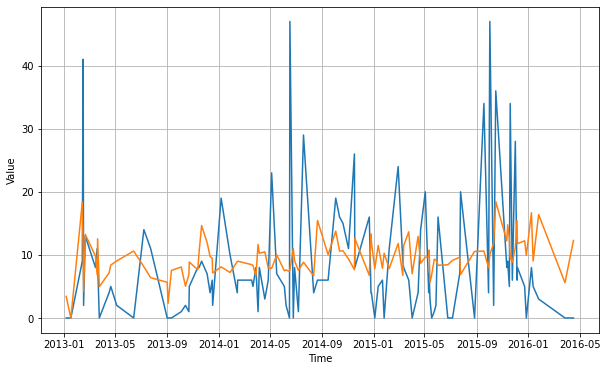

In [14]:
yh70 = y_hat_pd[y_hat_pd.idi == 70].sort_values(by=['d'])
y70 = y_test_pd[y_test_pd.idi == 70].sort_values(by=['d'])
plt.figure(figsize=(10, 6))
plot_series(y70['d'], y70['sold'])
plot_series(yh70['d'], yh70['sold'])

In [195]:
X = hobbies[(hobbies.d > 1913 - 28) & (hobbies.d < 1914 + 28)][tr_cm + ['d', 'id']].copy()

In [196]:
cm = ['wday', 'month', 'event_name_1_ord', 'event_name_2_ord']
days = X[X.d >= 1914][cm].to_numpy()
for i in range(len(cm)):
    X[cm[i]] = X[['d', cm[i]]].apply(lambda x: x[1] if x[0] > 1914 else days[x[0] - 1886, i], axis=1)    

In [197]:
trX = X[X.d < 1914][tr_cm + ['d', 'id']].copy()
y_hat = rg.predict(trX[tr_cm])
y_hat_pd = pd.DataFrame(y_hat, columns=['pred'], index=trX.index)
y_hat_pd['id'] = trX['id']
y_hat_pd['d'] = trX['d']

In [236]:
y_hat_pd['cm'] = y_hat_pd['d'].apply(lambda x: 'F' + str(x - 1885))

In [300]:
columns = ['F' + str(i) for i in range(1,29)] + ['id']
submission = []
for pn in y_hat_pd.id.unique():
    dd = y_hat_pd[y_hat_pd.id == pn]['pred'].T
    dd.columns = y_hat_pd[y_hat_pd.id == pn].cm
    dd['id'] = pn + "_validation"   
    submission.append(list(dd))
    submission.append([idv + '_evaluation'] + [0]*28)

In [301]:
pd.DataFrame(submission, columns=columns)

,F1,F2,F3,F4,F5,F6,F7,F8,F9,F10,...,F20,F21,F22,F23,F24,F25,F26,F27,F28,id
0,1.034560,1.164471,1.140969,1.061363,1.127913,1.254271,1.071790,0.890917,0.769549,0.695111,...,1.337357,1.552645,1.118032,1.012991,0.908030,0.826160,0.918639,1.142894,0.868738,HOBBIES_1_001_CA_1_validation
1,1.034560,1.164471,1.140969,1.061363,1.127913,1.254271,1.071790,0.890917,0.769549,0.695111,...,1.337357,1.552645,1.118032,1.012991,0.908030,0.826160,0.918639,1.142894,0.868738,HOBBIES_1_001_CA_1_evaluation
2,0.109844,0.109844,0.109844,0.186589,0.261558,0.337814,0.386020,0.365988,0.346705,0.346705,...,0.197429,0.183975,0.139352,0.139352,0.139352,0.142229,0.186253,0.237996,0.243536,HOBBIES_1_002_CA_1_validation
3,0.109844,0.109844,0.109844,0.186589,0.261558,0.337814,0.386020,0.365988,0.346705,0.346705,...,0.197429,0.183975,0.139352,0.139352,0.139352,0.142229,0.186253,0.237996,0.243536,HOBBIES_1_002_CA_1_evaluation
4,0.242916,0.242916,0.242916,0.242916,0.300746,0.754102,0.470634,0.423935,0.455089,0.421059,...,0.463144,0.383420,0.320757,0.320757,0.373586,0.434309,0.601309,0.719881,0.852168,HOBBIES_1_003_CA_1_validation
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11295,0.646755,0.566563,0.441620,0.501068,0.530798,0.511850,0.460473,0.459407,0.443000,0.564945,...,0.857262,0.715232,0.582740,0.552893,0.622477,0.877162,0.696775,0.574749,0.566414,HOBBIES_2_147_WI_3_evaluation
11296,0.297605,0.317687,0.221816,0.192093,0.201706,0.220762,0.182918,0.135623,0.088743,0.071990,...,0.641037,0.374674,0.316231,0.304157,0.251441,0.171977,0.201706,0.173835,0.165499,HOBBIES_2_148_WI_3_validation
11297,0.297605,0.317687,0.221816,0.192093,0.201706,0.220762,0.182918,0.135623,0.088743,0.071990,...,0.641037,0.374674,0.316231,0.304157,0.251441,0.171977,0.201706,0.173835,0.165499,HOBBIES_2_148_WI_3_evaluation
11298,0.443000,0.337617,0.319532,0.379942,0.393265,0.419166,0.345011,0.299656,0.299656,0.302533,...,0.366434,0.293179,0.211426,0.238223,0.221816,0.261182,0.288035,0.325084,0.316748,HOBBIES_2_149_WI_3_validation
